## Apply Linear Module and optimizer from Pytorch to achieve linear regression
#### 04/08/2020

In [1]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt

### Define one module for linear regression

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self,x):
        y_pred = self.fc(x)
        return y_pred

### Applying MSELoss and Adam optimizer with learning rate being 0.01

In [3]:
criterion = nn.MSELoss()
net_Adam = Net()
net_SGD = Net()
net_RMSprop = Net()

Adam_optimizer = optim.Adam(net_Adam.parameters(),lr=0.01)
SGD_optimizer = optim.SGD(net_SGD.parameters(),lr=0.01)
RMSprop_optimizer = optim.RMSprop(net_RMSprop.parameters(),lr=0.01)

### Input dataset has to be tensor
### And it has to be matrix but not a vector

In [4]:
x = torch.tensor([[1.0],[2.0],[3.0]])
x.t()
y = torch.tensor([[3.0],[2.0],[1.0]])
y.t()

loss_list_Adam = []
loss_list_SGD = []
loss_list_RMSprop = []
print(x)

tensor([[1.],
        [2.],
        [3.]])


## Something to be aware of:
- For a module, there are two modes: training mode as well as evaluation mode
so when training, use net.train() to note that its training; and net.eval() to note its evaluation
- Before backward, make sure that the optimizer has zero_grad()ed
unless some special requirement exist

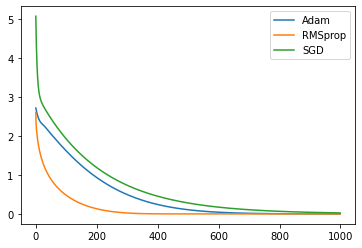

In [5]:
for e in range(1000):
    net_Adam.train()
    
    Adam_optimizer.zero_grad()
    y_pred = net_Adam(x)
    loss = criterion(y_pred,y)
    
    loss.backward()
    Adam_optimizer.step()
    loss_list_Adam.append(loss.item())
    
for e in range(1000):
    net_SGD.train()
    
    SGD_optimizer.zero_grad()
    y_pred = net_SGD(x)
    loss = criterion(y_pred,y)
    
    loss.backward()
    SGD_optimizer.step()
    loss_list_SGD.append(loss.item())
    
for e in range(1000):
    net_RMSprop.train()
    
    RMSprop_optimizer.zero_grad()
    y_pred = net_RMSprop(x)
    loss = criterion(y_pred,y)
    
    loss.backward()
    RMSprop_optimizer.step()
    loss_list_RMSprop.append(loss.item())
    
plt.plot(loss_list_Adam,label='Adam')
plt.plot(loss_list_RMSprop,label='RMSprop')
plt.plot(loss_list_SGD,label='SGD')
plt.legend()

### As we can see, the time taken to get convergence for those three optimizers is different
#### Adam > RMSprop > SGD

In [6]:
# Cast prediction
net_Adam.eval()
net_RMSprop.eval()
net_SGD.eval()
x_test = torch.tensor([[2.0],[4.0],[6.0]])
print('Adam:\t\t',net_Adam(x_test).t().data)
print('RMSprop:\t',net_RMSprop(x_test).t().data)
print('SGD:\t\t',net_SGD(x_test).t().data)

Adam:		 tensor([[ 1.9932,  0.0373, -1.9187]])
RMSprop:	 tensor([[ 1.9853, -0.0246, -2.0345]])
SGD:		 tensor([[ 1.9495,  0.3190, -1.3115]])
